# Question for Dataset1

1. Basic DataFrame Operations:
- Load the dataset into a Pandas DataFrame.
- Display the first 5 rows of the DataFrame.
- Display the summary statistics of the DataFrame.
- Display the column names of the DataFrame.
- Count the number of male and female students.


In [39]:
import pandas as pd

students_grades = pd.read_csv('students_grades.csv')
students_grades.head()

,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
1,2,Alice,15,F,79,95,88,92,87
2,3,Bob,16,M,90,85,86,88,95
3,4,Carol,15,F,77,89,90,81,85
4,5,David,16,M,92,80,79,85,92


In [ ]:
students_grades.describe()

,StudentID,Age,Math,Science,English,History,Physical_Education
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,15.500000,83.500000,88.400000,84.800000,85.600000,89.200000
std,3.02765,0.527046,5.642104,4.623611,4.077036,4.299871,3.119829
min,1.00000,15.000000,75.000000,80.000000,78.000000,78.000000,85.000000
25%,3.25000,15.000000,79.250000,85.500000,82.500000,83.250000,87.250000
50%,5.50000,15.500000,84.500000,89.500000,85.500000,85.500000,89.500000
75%,7.75000,16.000000,87.250000,91.750000,87.750000,88.750000,90.750000
max,10.00000,16.000000,92.000000,95.000000,90.000000,92.000000,95.000000


In [13]:
students_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StudentID           10 non-null     int64 
 1   Name                10 non-null     object
 2   Age                 10 non-null     int64 
 3   Gender              10 non-null     object
 4   Math                10 non-null     int64 
 5   Science             10 non-null     int64 
 6   English             10 non-null     int64 
 7   History             10 non-null     int64 
 8   Physical_Education  10 non-null     int64 
 9   Total_Grades        10 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 932.0+ bytes


In [22]:
gender_grouped = students_grades.groupby('Gender')['StudentID'].sum()
gender_grouped

Gender
F    30
M    25
Name: StudentID, dtype: int64

# 2. Filtering and Subsetting:

- Filter the DataFrame to show only students who are 16 years old.
- Filter the DataFrame to show only female students.
- Filter the DataFrame to show students with Math scores above 85.
- Select the Name and Total_Grades columns for all students.
- Pandas Lab2Calculate the average Math score for male and female students.


In [40]:
sixteen_year_olds = students_grades[students_grades["Age"] == 16]
print("Students who are 16 years old:")
sixteen_year_olds

Students who are 16 years old:


,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
0,1,John,16,M,85,92,78,84,90
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
6,7,Frank,16,M,75,90,82,78,88
8,9,Henry,16,M,88,83,87,86,85


In [41]:
female_students = students_grades[students_grades["Gender"] == "F"]
print("Female students:")
female_students

Female students:


,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
1,2,Alice,15,F,79,95,88,92,87
3,4,Carol,15,F,77,89,90,81,85
5,6,Eve,15,F,85,87,84,89,90
7,8,Grace,15,F,80,92,85,90,91
9,10,Ivy,15,F,84,91,89,83,89


In [42]:
math_above_85 = students_grades[students_grades["Math"] > 85]
print("Students with Math scores above 85:")
math_above_85

Students with Math scores above 85:


,StudentID,Name,Age,Gender,Math,Science,English,History,Physical_Education
2,3,Bob,16,M,90,85,86,88,95
4,5,David,16,M,92,80,79,85,92
8,9,Henry,16,M,88,83,87,86,85


In [43]:

students_grades["Total_Grades"] = students_grades[["Math", "Science", "English", "History", "Physical_Education"]].sum(axis=1)
print("Name and Total Grades:")
name_and_total_grades

Name and Total Grades:


,Name,Total_Grades
0,John,429
1,Alice,441
2,Bob,444
3,Carol,422
4,David,428
5,Eve,435
6,Frank,413
7,Grace,438
8,Henry,429
9,Ivy,436


In [44]:
name_and_total_grades = students_grades[["Name", "Total_Grades"]]
average_math_by_gender = students_grades.groupby("Gender")["Math"].mean()
print("Average Math score by gender:")
average_math_by_gender

Average Math score by gender:


Gender
F    81.0
M    86.0
Name: Math, dtype: float64

# 3. Aggregation and Grouping:
- Calculate the average grade for each subject.
- Calculate the average grade for each gender.
- Calculate the total grades for each student (sum of all subjects).
- Find the student with the highest total grade.
- Calculate the average age of the students.


In [83]:
average_grade = pd.DataFrame(students_grades[["Math", "Science", "English", "History", "Physical_Education"]].mean())
average_grade

,0
Math,83.5
Science,88.4
English,84.8
History,85.6
Physical_Education,89.2


In [51]:
students_grades.groupby('Gender')[["Math", "Science", "English", "History", "Physical_Education"]].mean()

,Math,Science,English,History,Physical_Education
Gender,,,,,
F,81.0,90.8,87.2,87.0,88.4
M,86.0,86.0,82.4,84.2,90.0


In [76]:
name_grouped = students_grades.groupby('Name')['Total_Grades'].mean()
name_grouped

Name
Alice    441.0
Bob      444.0
Carol    422.0
David    428.0
Eve      435.0
Frank    413.0
Grace    438.0
Henry    429.0
Ivy      436.0
John     429.0
Name: Total_Grades, dtype: float64

In [78]:
highest = name_grouped.sort_values(ascending=False).iloc[:1]
highest

Name
Bob    444.0
Name: Total_Grades, dtype: float64

In [80]:
average_age = students_grades['Age'].mean()
print(average_age)

15.5


# 4. Data Visualization:
- Create a bar plot showing the average grade for each subject.
- Create a bar plot showing the total grades of each student.
- Create a histogram showing the distribution of Math scores.
- Create a box plot to show the distribution of grades for each subject.
- Create a scatter plot showing the relationship between Math and Science scores.

In [86]:
import matplotlib.pyplot as plt

<Figure size 1000x600 with 0 Axes>

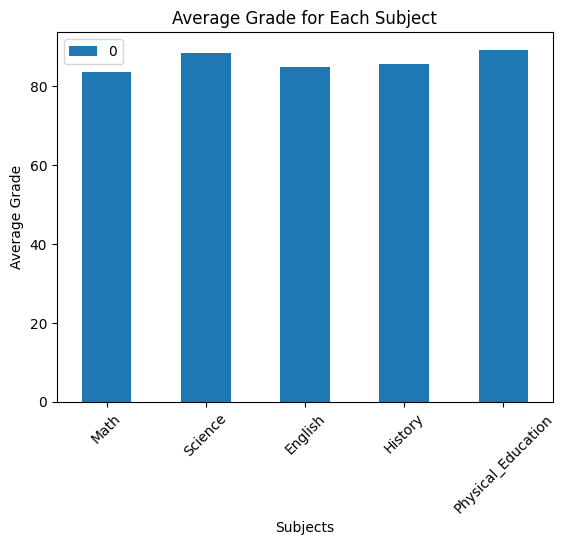

In [102]:
# Average grade for each subject
plt.figure(figsize=(10, 6))
average_grade.plot(kind='bar')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.show()

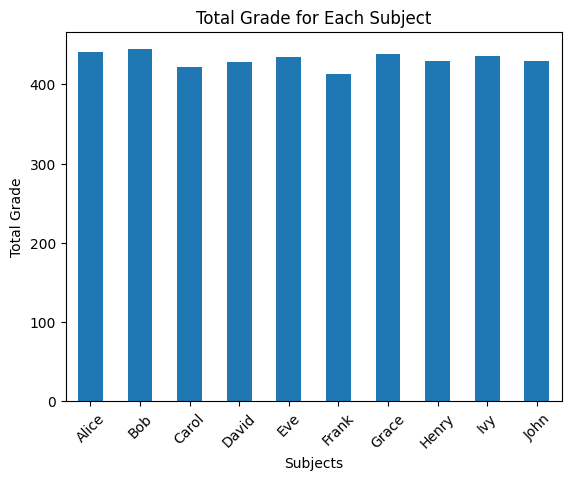

In [167]:
# Total grade for each subject
name_grouped.plot(kind='bar')
plt.title('Total Grade for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Total Grade')
plt.xticks(rotation=45)
plt.show()

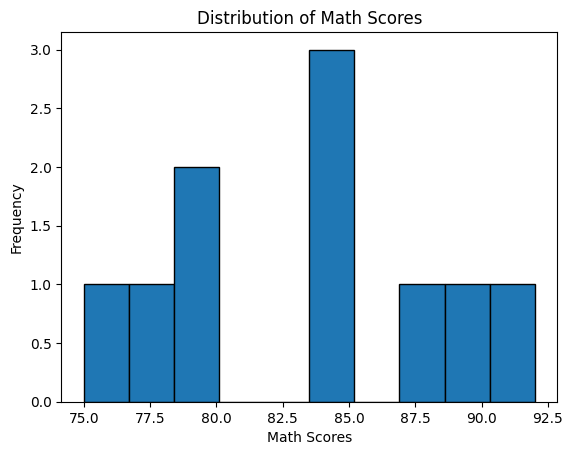

In [168]:
# Create histogram for Math scores distribution
plt.hist(students_grades['Math'], bins=10, edgecolor='black')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Frequency')
plt.show()

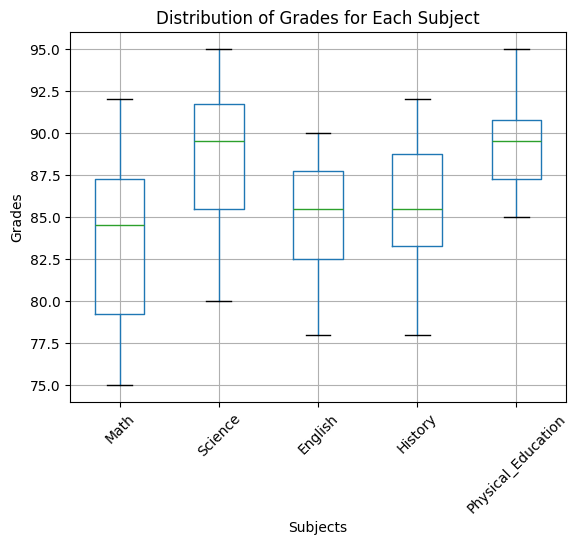

In [169]:
# Create box plot for all subjects
subjects = ['Math', 'Science', 'English', 'History', 'Physical_Education']
students_grades[subjects].boxplot()
plt.title('Distribution of Grades for Each Subject')
plt.xlabel('Subjects')
plt.ylabel('Grades')
plt.xticks(rotation=45)
plt.show()

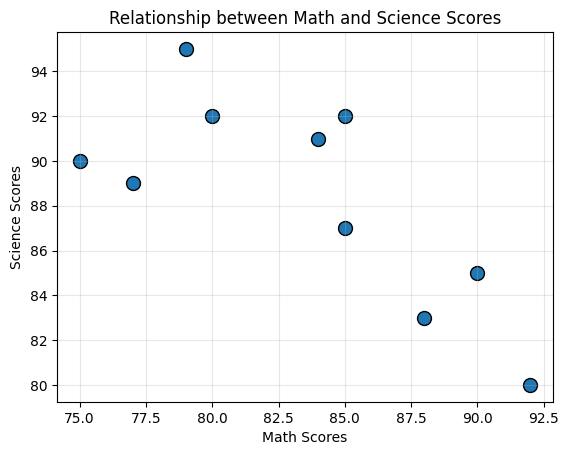

In [170]:
# Create scatter plot for Math vs Science scores
plt.scatter(students_grades['Math'], students_grades['Science'], s=100, edgecolors='black')
plt.title('Relationship between Math and Science Scores')
plt.xlabel('Math Scores')
plt.ylabel('Science Scores')
plt.grid(alpha=0.3)

plt.show()

# Questions for Dataset 2:

## 1. Basic DataFrame Operations:
- Load the dataset into a Pandas DataFrame.
- Display the first 5 rows of the DataFrame.
- Display the summary statistics of the DataFrame.
- Display the column names of the DataFrame.
- Count the number of employees in each department.

In [123]:
employee = pd.read_csv('employee_data.csv')
employee.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
0,101,John Smith,28,Sales,60000,3
1,102,Jane Doe,34,Marketing,80000,7
2,103,Sam Johnson,45,HR,75000,10
3,104,Susan Lee,39,Finance,90000,5
4,105,Peter Brown,50,IT,95000,15


In [124]:
employee.describe()

,EmployeeID,Age,Salary,YearsAtCompany
count,10.00000,10.000000,10.00000,10.000000
mean,105.50000,36.300000,76700.00000,7.100000
std,3.02765,7.660142,11343.62278,4.012481
min,101.00000,27.000000,60000.00000,2.000000
25%,103.25000,29.750000,70500.00000,4.250000
50%,105.50000,36.000000,76500.00000,6.500000
75%,107.75000,40.500000,83750.00000,9.500000
max,110.00000,50.000000,95000.00000,15.000000


In [125]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeID      10 non-null     int64 
 1   Name            10 non-null     object
 2   Age             10 non-null     int64 
 3   Department      10 non-null     object
 4   Salary          10 non-null     int64 
 5   YearsAtCompany  10 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 612.0+ bytes


In [127]:
employee_each_department = employee['Department'].value_counts()
employee_each_department

Department
Sales        2
Marketing    2
HR           2
Finance      2
IT           2
Name: count, dtype: int64

## 2. Filtering and Subsetting:
- Filter the DataFrame to show only employees who are older than 40.
- Filter the DataFrame to show only employees in the 'IT' department.
- Filter the DataFrame to show employees with a salary above 75000.
- Select the Name and Salary columns for all employees.
- Calculate the average salary for each department.

In [128]:
employee_older_40 = employee[employee["Age"] > 40]
employee_older_40

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
2,103,Sam Johnson,45,HR,75000,10
4,105,Peter Brown,50,IT,95000,15
7,108,Karen Black,41,HR,78000,11


In [129]:
employee_IT = employee[employee['Department'] == 'IT']
employee_IT

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
4,105,Peter Brown,50,IT,95000,15
9,110,Alice Purple,27,IT,70000,2


In [130]:
employee_salary_above_70000 = employee[employee['Salary'] > 70000]
employee_salary_above_70000

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
1,102,Jane Doe,34,Marketing,80000,7
2,103,Sam Johnson,45,HR,75000,10
3,104,Susan Lee,39,Finance,90000,5
4,105,Peter Brown,50,IT,95000,15
6,107,David White,32,Marketing,72000,6
7,108,Karen Black,41,HR,78000,11
8,109,James Blue,38,Finance,85000,8


In [131]:
employee_name_salary = employee[['Name', 'Salary']]
employee_name_salary

,Name,Salary
0,John Smith,60000
1,Jane Doe,80000
2,Sam Johnson,75000
3,Susan Lee,90000
4,Peter Brown,95000
5,Linda Green,62000
6,David White,72000
7,Karen Black,78000
8,James Blue,85000
9,Alice Purple,70000


In [133]:
average_salary_department = employee.groupby('Department')['Salary'].mean()
average_salary_department

Department
Finance      87500.0
HR           76500.0
IT           82500.0
Marketing    76000.0
Sales        61000.0
Name: Salary, dtype: float64

## 3. Aggregation and Grouping:
- Calculate the average salary of all employees.
- Calculate the average age of employees in each department.
- Calculate the total years worked at the company for all employees.
- Find the employee with the highest salary.
- Calculate the average years at the company for each department.

In [137]:
average_salary = employee['Salary'].mean()
print(average_salary)

76700.0


In [138]:
average_age_department = employee.groupby('Department')['Age'].mean()
average_age_department

Department
Finance      38.5
HR           43.0
IT           38.5
Marketing    33.0
Sales        28.5
Name: Age, dtype: float64

In [142]:
total_years = employee['YearsAtCompany'].sum()
print(total_years)

71


In [144]:
highest_salary = employee.sort_values(by='Salary', ascending=False).iloc[:1]
highest_salary

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany
4,105,Peter Brown,50,IT,95000,15


In [145]:
average_years_department = employee.groupby('Department')['YearsAtCompany'].mean()
average_years_department

Department
Finance       6.5
HR           10.5
IT            8.5
Marketing     6.5
Sales         3.5
Name: YearsAtCompany, dtype: float64

## 4. Data Visualization:
- Create a bar plot showing the average salary for each department.
- Create a bar plot showing the total years at the company for each employee.
- Create a histogram showing the distribution of employee ages.
- Create a box plot to show the distribution of salaries for each department.
- Create a scatter plot showing the relationship between age and salary

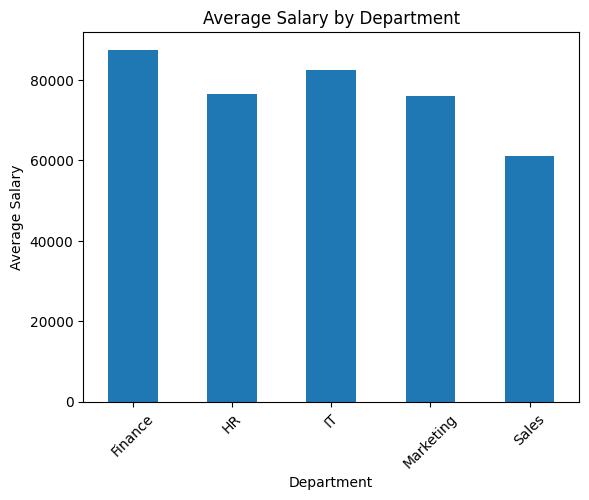

In [ ]:
# - Create a bar plot showing the average salary for each department.
average_salary_department.plot(kind='bar')
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

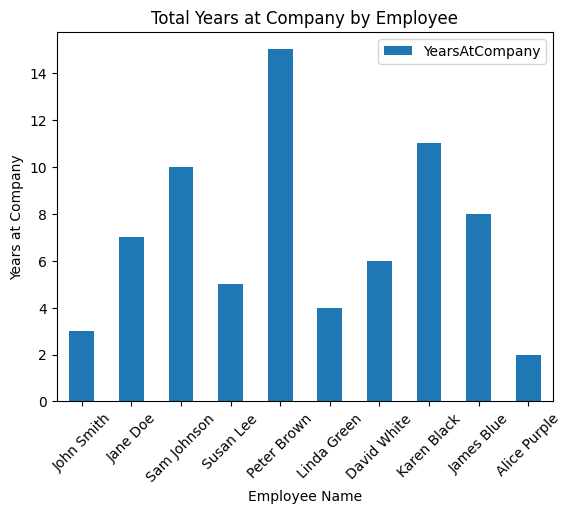

In [152]:
# - Create a bar plot showing the total years at the company for each employee.
employee_name_years = employee[['Name', 'YearsAtCompany']].set_index('Name')
employee_name_years.plot(kind='bar')
plt.title('Total Years at Company by Employee')
plt.xlabel('Employee Name')
plt.ylabel('Years at Company')
plt.xticks(rotation=45)
plt.show()



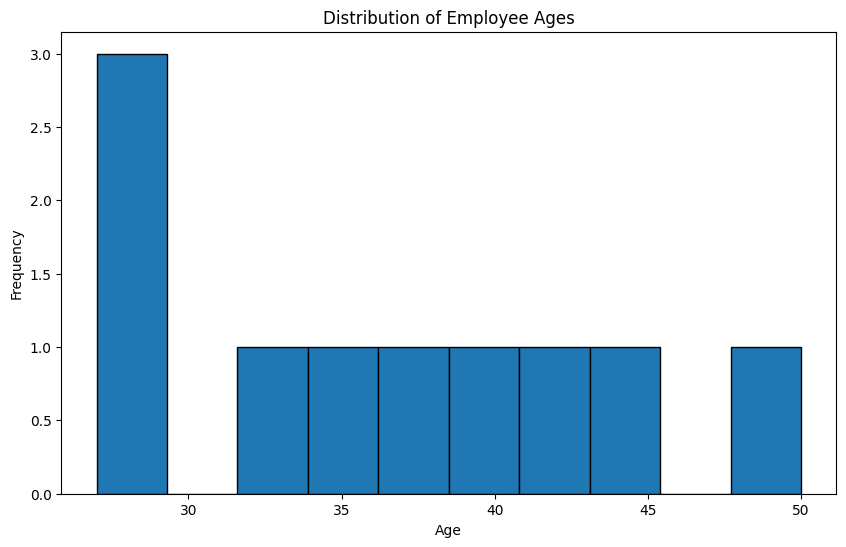

In [153]:
# - Create a histogram showing the distribution of employee ages.
plt.figure(figsize=(10, 6))
plt.hist(employee['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


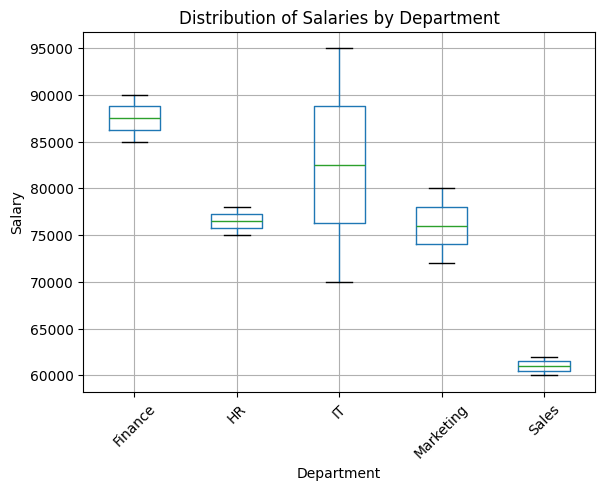

In [164]:
# - Create a box plot to show the distribution of salaries for each department.
employee.boxplot(column='Salary', by='Department')
plt.title('Distribution of Salaries by Department')
plt.suptitle('')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()


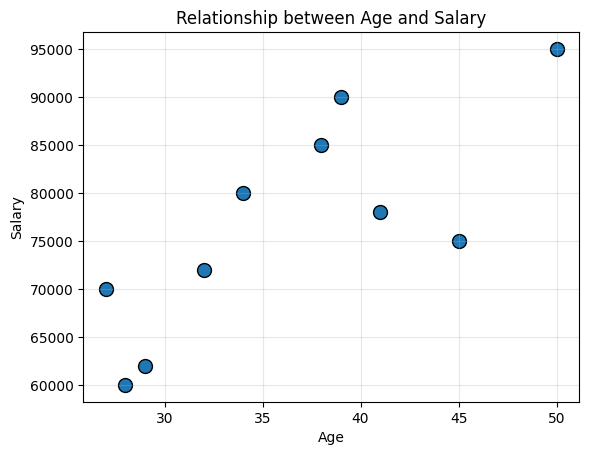

In [166]:
# - Create a scatter plot showing the relationship between age and salary
plt.scatter(employee['Age'], employee['Salary'], s=100, edgecolors='black')
plt.title('Relationship between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(alpha=0.3)
plt.show()